# 散点图

使用Seaborn轻松搞定散点图

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# 指定字体大小
matplotlib.rcParams['font.size'] = 18

import seaborn as sns

sns.set_context('talk', font_scale=1.2);

# Gapminder Socioeconomic Data

数据简介：

-  Country：国家
-  Continent: 地区
-  Year: 年份
-  life_exp: 预期寿命
-  pop: 人口
-  gdp_per_cap: 人均国内生产总值

In [3]:
df = pd.read_csv('data/gapminder_data.csv')
df.columns = ['country', 'continent', 'year', 'life_exp', 'pop', 'gdp_per_cap']
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


使用 `describe` 直接可以得到统计信息

In [4]:
df.describe()

,year,life_exp,pop,gdp_per_cap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


## 使用Seaborn来绘制散点图


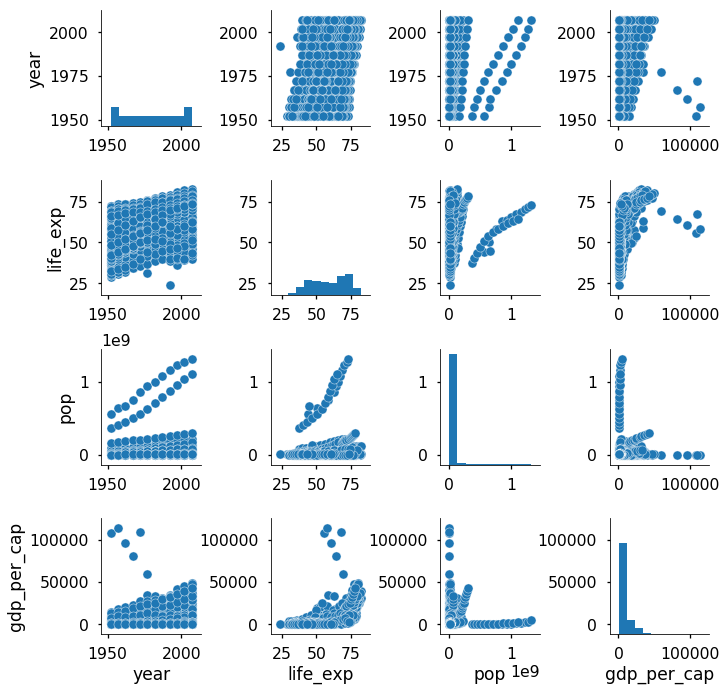

In [5]:
sns.pairplot(df)

很轻松就画出来啦，可以看出来不同特征之间的相关性，然后我们来看一看有什么问题呢？数据分布好像有点散啊。

对数变换能让图更好看一些！

In [6]:
df['log_pop'] = np.log10(df['pop'])
df['log_gdp_per_cap'] = np.log10(df['gdp_per_cap'])

df = df.drop(['pop', 'gdp_per_cap'],axis=1)

## 用不同颜色表示不同地区

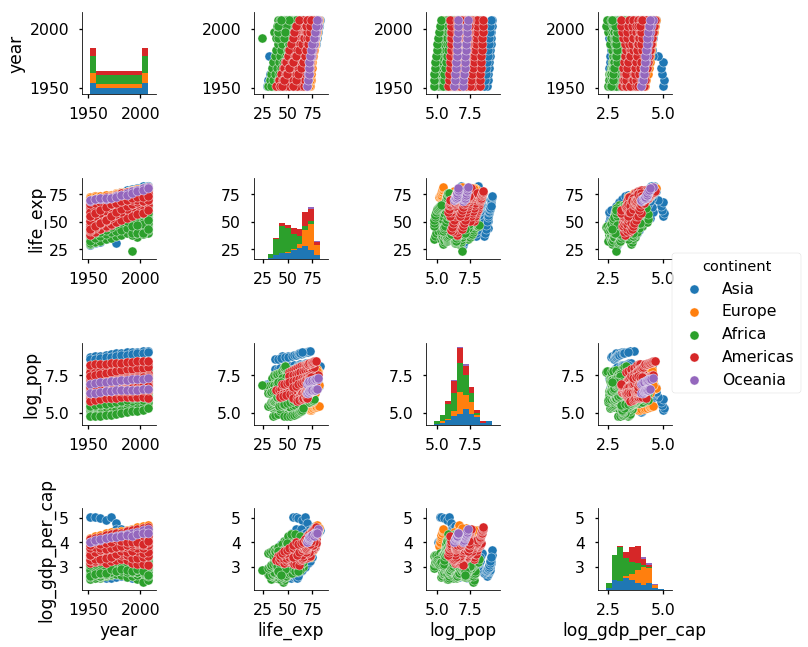

In [7]:
matplotlib.rcParams['font.size'] = 40
sns.pairplot(df, hue = 'continent');

指定参数

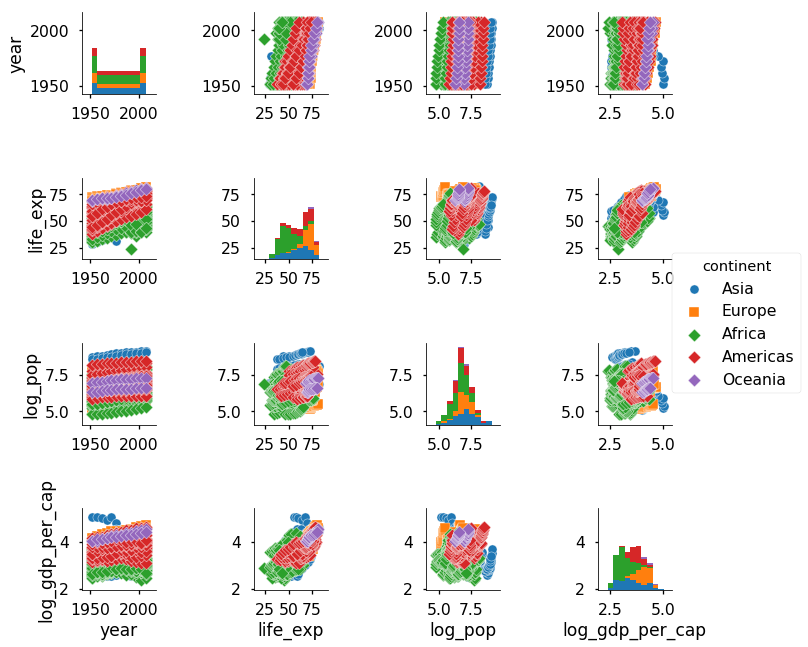

In [9]:
sns.pairplot(df, hue = 'continent',markers=["o", "s", "D", "D", "D"] )

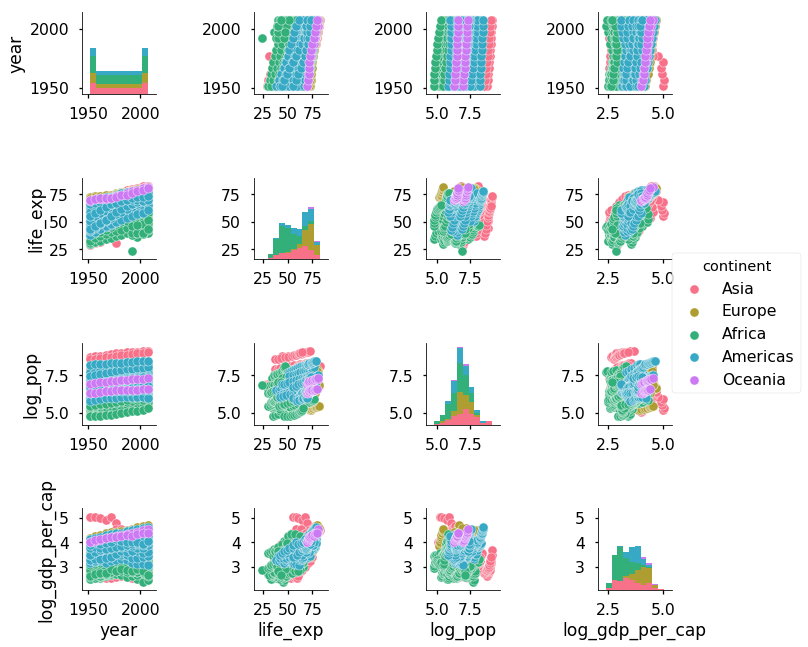

In [10]:
sns.pairplot(df, hue = 'continent',palette="husl");

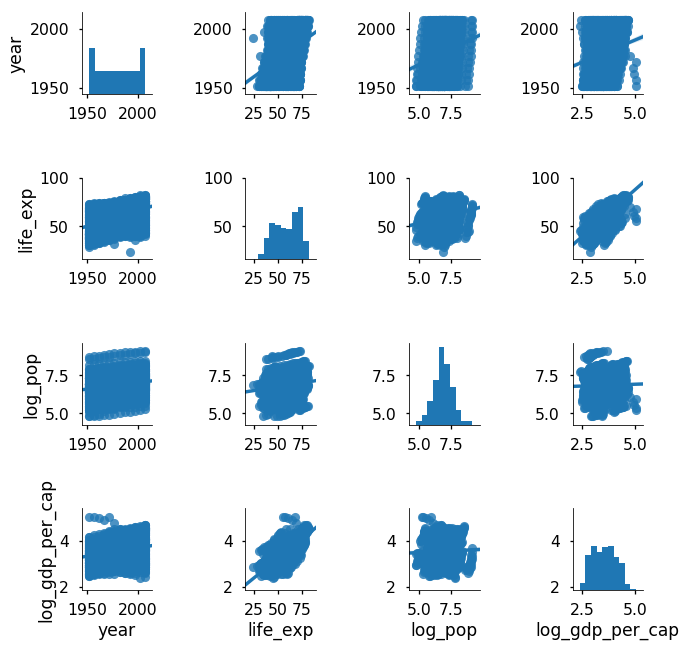

In [15]:
sns.pairplot(df,kind="reg")

In [28]:
#markers=["o", "s", "D"] 
#palette="husl"
#kind="reg"

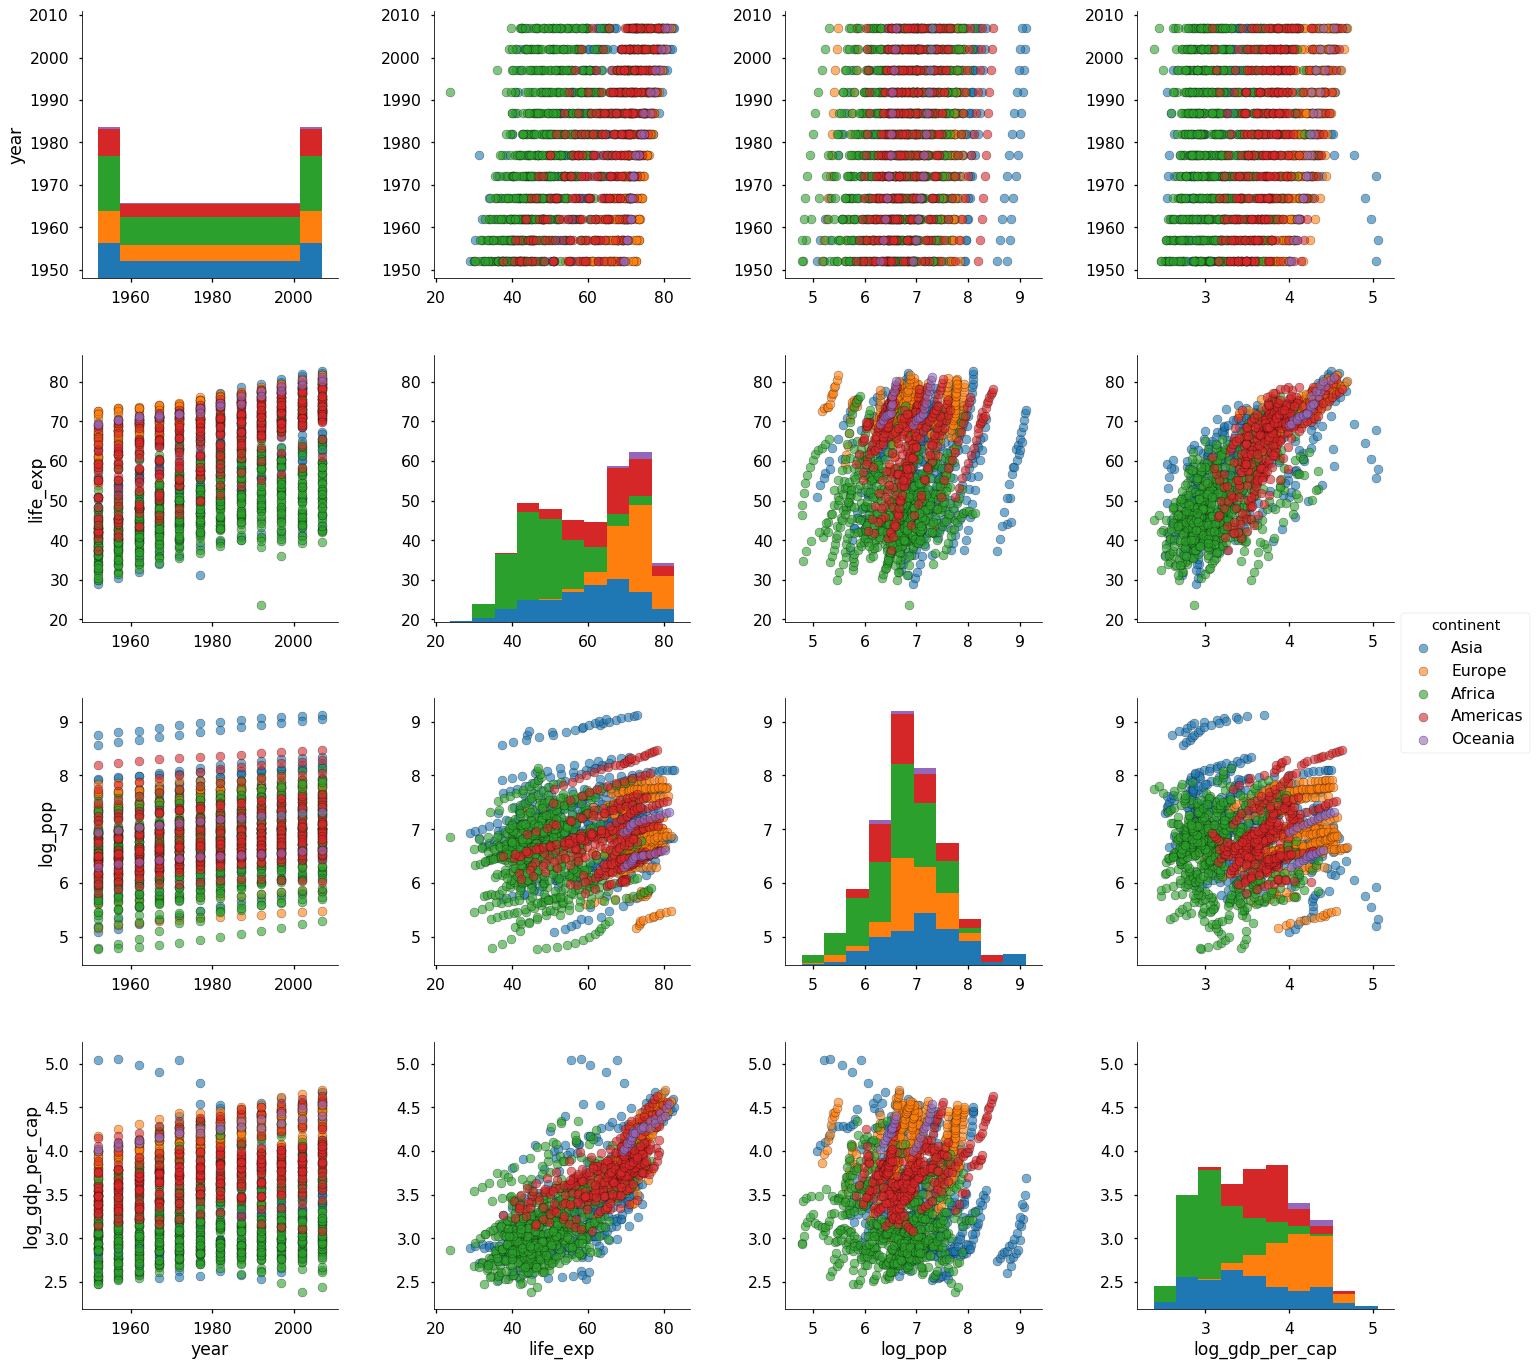

In [20]:
sns.pairplot(df, hue = 'continent',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 5)

加入不同的年份

In [38]:
df['decade'] = pd.cut(df['year'], bins = range(1950, 2010, 10))
df.head()

,country,continent,year,life_exp,log_pop,log_gdp_per_cap,decade
0,Afghanistan,Asia,1952,28.801,6.925587,2.891786,"(1950, 1960]"
1,Afghanistan,Asia,1957,30.332,6.965716,2.914265,"(1950, 1960]"
2,Afghanistan,Asia,1962,31.997,7.011447,2.931000,"(1960, 1970]"
3,Afghanistan,Asia,1967,34.020,7.062129,2.922309,"(1960, 1970]"
4,Afghanistan,Asia,1972,36.088,7.116590,2.869221,"(1970, 1980]"


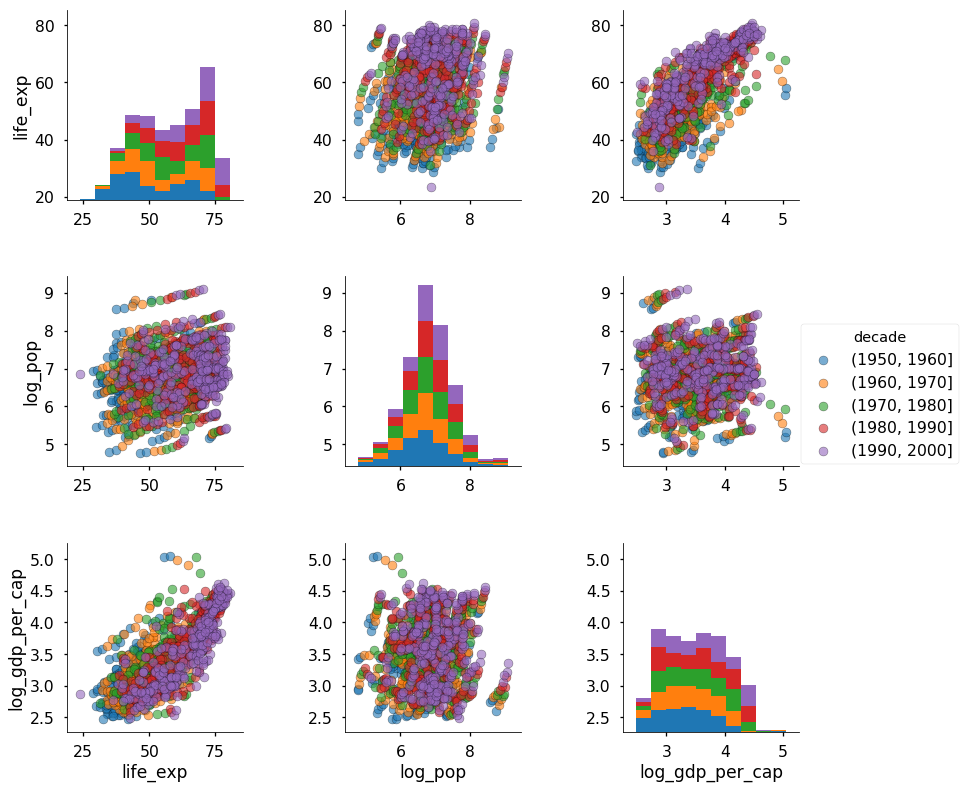

In [39]:
sns.pairplot(df, hue = 'decade', vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'],
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)

观察指定指标与特征

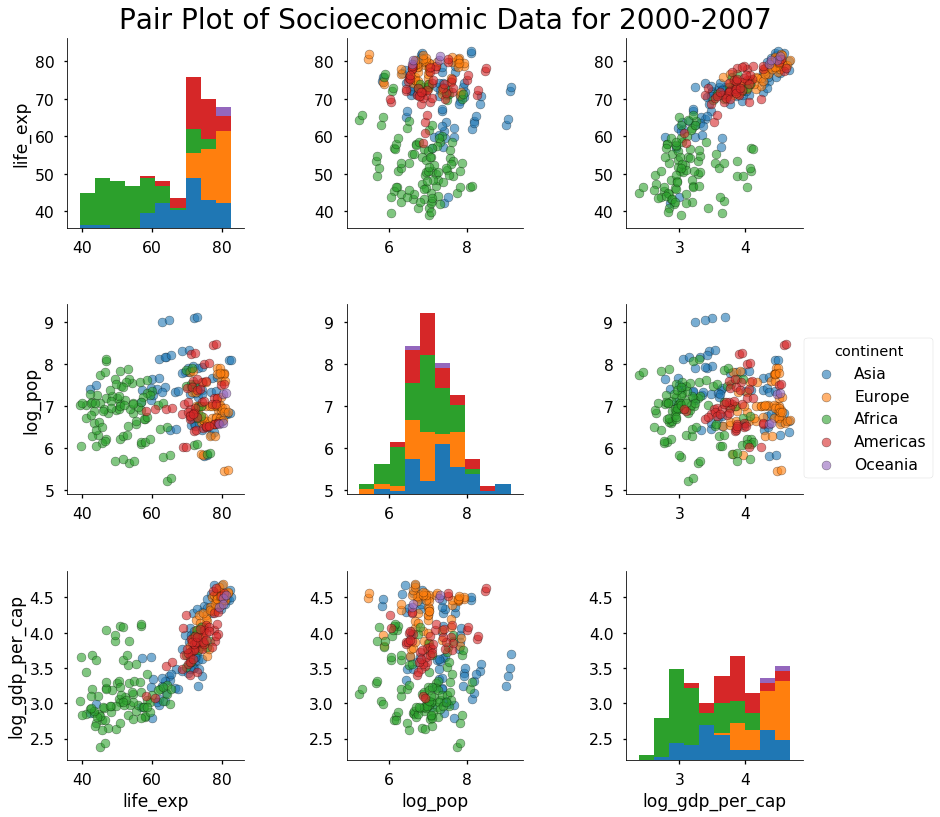

In [41]:
sns.pairplot(df[df['year'] >= 2000], vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], 
             hue = 'continent',  plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);
plt.suptitle('Pair Plot of Socioeconomic Data for 2000-2007', size = 28);

## 使用 `sns.PairGrid` 进行自定义绘图


e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


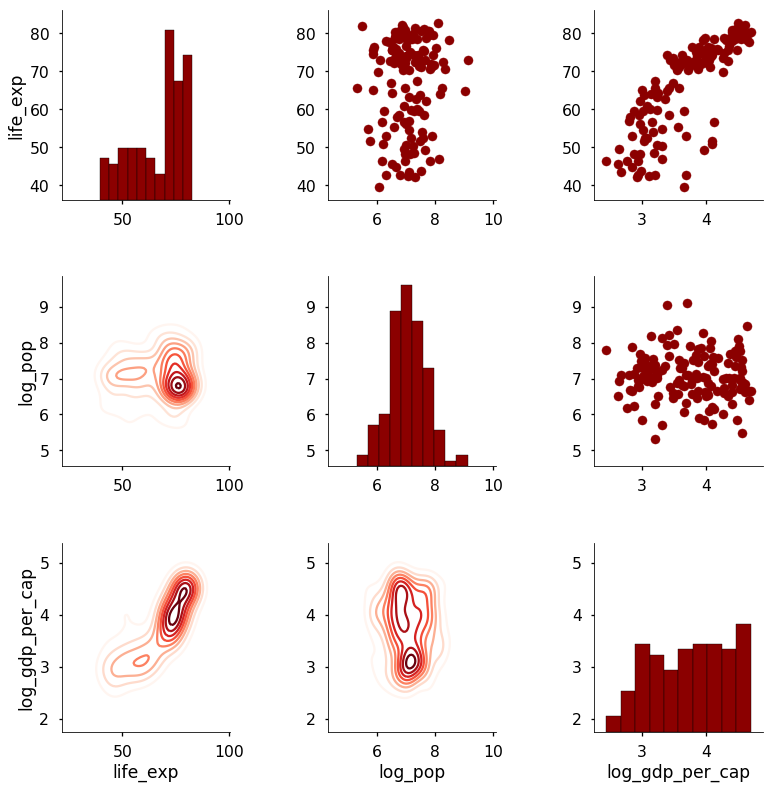

In [42]:
# 首先得实例化对象
grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

# Map绘制不同图
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k');

e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


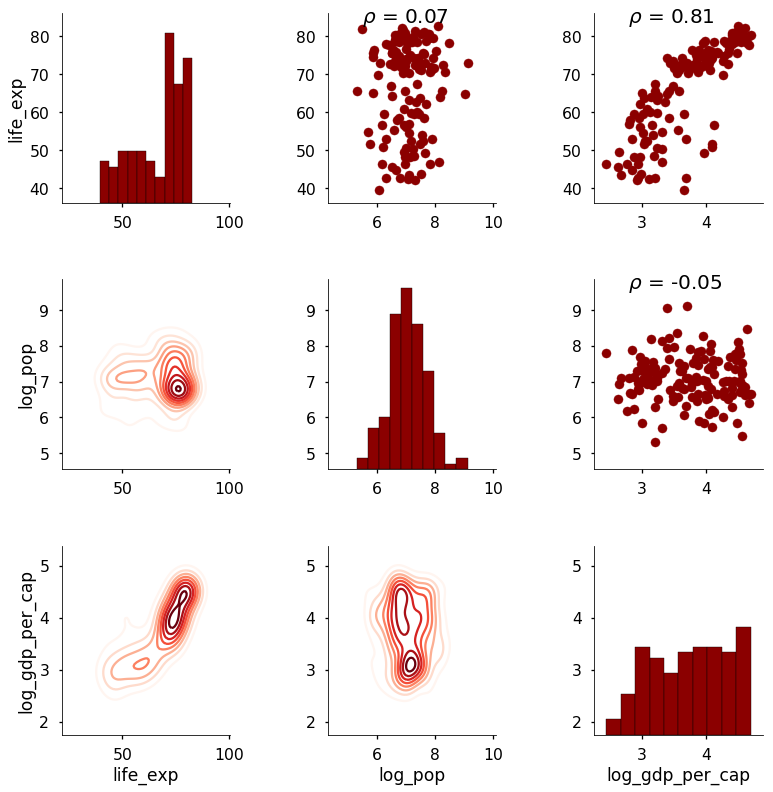

In [43]:
# 计算相关系数
def corr(x, y, **kwargs):
    
    
    coef = np.corrcoef(x, y)[0][1]
    
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# 类实例化
grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

# Map
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

自定义统计特征

e:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


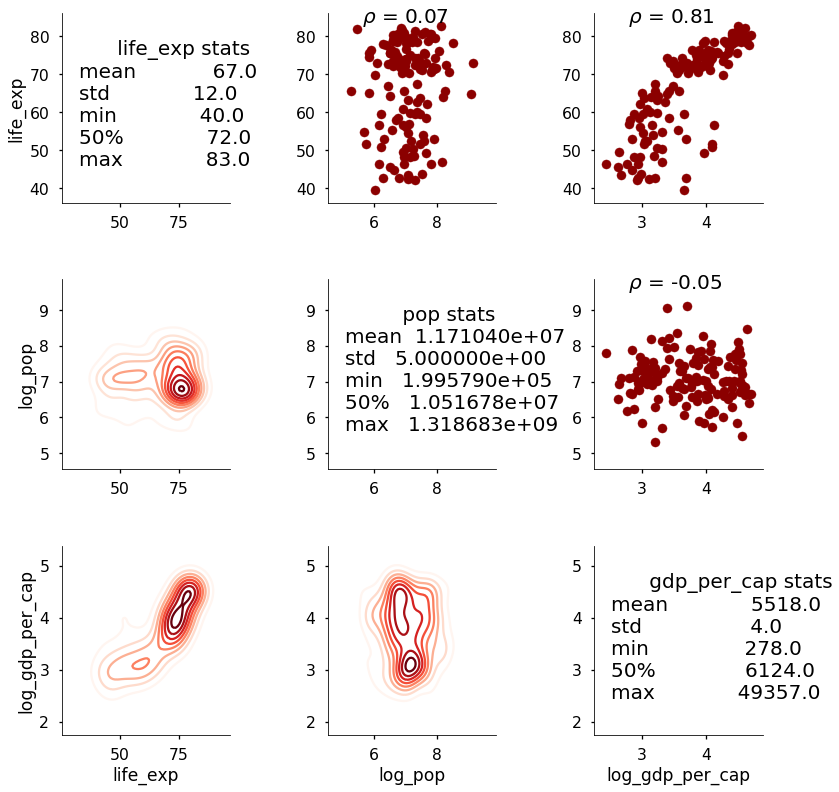

In [44]:
def summary(x, **kwargs):

    x = pd.Series(x)

    label = x.describe()[['mean', 'std', 'min', '50%', 'max']]
    
    if label.name == 'log_pop':
        label = 10 ** label
        label.name = 'pop stats'
    elif label.name == 'log_gdp_per_cap':
        label = 10 ** label
        label.name = 'gdp_per_cap stats'
    else:
        label.name = 'life_exp stats'
       
    label = label.round()
    ax = plt.gca()
    ax.set_axis_off()

    ax.annotate(pd.DataFrame(label),
               xy = (0.1, 0.2), size = 20, xycoords = ax.transAxes)    
    

grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)


grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(summary);